In [7]:
#plot predicted ntibody escpe values with the structural distortion from the wildtype?...
import os
from Bio import SeqIO
import sys
sys.path.append('/mnt/ncshare/ozkilim/covid/covid_landscape/SARS2_RBD_Ab_escape_maps')
from bindingcalculator import BindingCalculator
from biopandas.pdb import PandasPdb
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def distance_matrix_creator(PDB_filename):
    """"This function takes in a PDB and ... it returns a symetrix MxM matrix that is rotation and shift independant"""""
    ppdb = PandasPdb()
    data = ppdb.read_pdb(PDB_filename)
    atom_data = ppdb.df['ATOM']    
    mut_removed = atom_data
    position_matrix = mut_removed[["residue_number","x_coord" , "y_coord" , "z_coord"]]
    # aggresgate and take mean of xyz values for each residue as an approximation.
    aggregation_functions = {'x_coord': 'mean', 'y_coord': 'mean', 'z_coord': 'mean'}
    position_matrix = position_matrix.groupby(position_matrix['residue_number']).aggregate(aggregation_functions)  
    # cartersian productcartersian product of distance. 
    dist_mat = distance_matrix(position_matrix,position_matrix,p=2) #p=2 for euclidian disntace

    return dist_mat 


bindcalc = BindingCalculator(csv_or_url='../../covid_landscape/SARS2_RBD_Ab_escape_maps/processed_data/escape_calculator_data.csv')
wuhan_mat = distance_matrix_creator("../../covid_exploration/alfafold_mainvariants/pdbs/Wuhan_RBD.pdb")
# loop over fasta sequenes. 
wuhan_string = list("NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST")

all_vars = ["wuhan","alpha","beta","delta","eta","omicron_ba1","omicron_ba1"]
pdb_vars = ["Wuhan","Alpha","Beta","Delta","Eta","Omicron","OmicronBA2"]

all_rets = []
all_dists = []
for var, pdb_var in zip(all_vars,pdb_vars):
    directory = "../FASTA/"+var
    dist_list = []
    ret_list = []
    i=0
    for file in  os.listdir(directory):
        i = i+1
        try:
            path  = directory + "/" + file
            mut_name = file[-11:-6]
            fasta_sequences = SeqIO.read(path,'fasta')
            aa_seq = list(str(fasta_sequences.seq))
            positions = [i for i in range(len(aa_seq)) if aa_seq[i] != wuhan_string[i]]
            change_positions = [x+331 for x in positions] 
            # double check what value really need to be added to be correct..
            binding_ret = bindcalc.binding_retained(change_positions)
            pdb_file = "../structures/"+ var +"/rot-"+pdb_var+"_RBD_331_531_"+mut_name+".pdb"
            mat = distance_matrix_creator(pdb_file)
            dist = np.mean(np.abs(wuhan_mat-mat))
            # only if both calcualtions worked then append
            ret_list.append(binding_ret)
            dist_list.append(dist)
            print(i)
        except:
            pass
    all_rets.append(ret_list)
    all_dists.append(dist_list)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


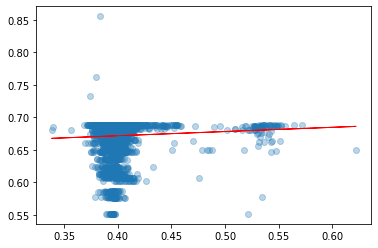

In [ ]:
np.save(np.array([all_rets,all_dists]), "antibody_escape_reasults.npy")
# Plot all together on one plot? vs all distoritions from wuhan?... is the distoriton to shifft metrcic? make abs. All the vairnets.... why wuahn not htere?..

In [ ]:
from sklearn.linear_model import LinearRegression
from matplotlib import cm

colors = cm.get_cmap('Accent')
fig = plt.figure(figsize=(12, 5))

for idx , (dist_list,ret_list) in enumerate(zip(all_dists,all_rets)):
    x = np.array(dist_list)
    y = np.array(ret_list)
    plt.scatter(x,y,alpha=0.3,c=colors(idx))

plt.show()


In [ ]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x.reshape(-1, 1), y.reshape(-1, 1))  # perform linear regression
y_pred = linear_regressor.predict(x.reshape(-1, 1))  # make predictions
plt.plot(x, y_pred, color='red', linewidth=1)
